## Multivariate Analysis

### Overview

Multivariate analysis is the process to find the relationship between three or more features in the dataset

**Visual Exploration**
- 3D scatterplots of predictors colored by outcome.
- Pairplot (all predictors, hue = outcome) to spot separation patterns.
- Dimensionality reduction (PCA, t-SNE) → project many predictors into 2D/3D and color by outcome.

**Statistical Tests**
- MANOVA → test whether multiple predictors jointly differ across outcome groups.
- Logistic regression / discriminant analysis with multiple predictors → check significance of combined effects.

**Model-Based Exploration**
- Decision tree / random forest → capture non-linear interactions, check feature importance.
- Add interaction terms (e.g. Glucose × BMI × Insulin) in regression to test joint influence.

**Interpretation**
- Do combinations of predictors improve separation between outcome groups?
- Which predictors interact to give stronger signals than alone?
- Are there hidden clusters in higher dimensions aligned with the outcome?

### Preparation

#### Separate predictors and outcome

In [1]:
import numpy as np
import pandas as pd

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

features = df.drop(columns=["Outcome"])
label = df["Outcome"]

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix to identify strongly related features
corr_matrix = df.corr()
high_corr_list = []
for row in features:
    for col in features:
        if row == col:
            continue
        if abs(corr_matrix[row][col]) > 0.8:
            high_corr_list.append(f"{row} - {col}")
print(f"High correlation: {high_corr_list if len(high_corr_list) > 0 else "None"}")

High correlation: None


<Axes: >

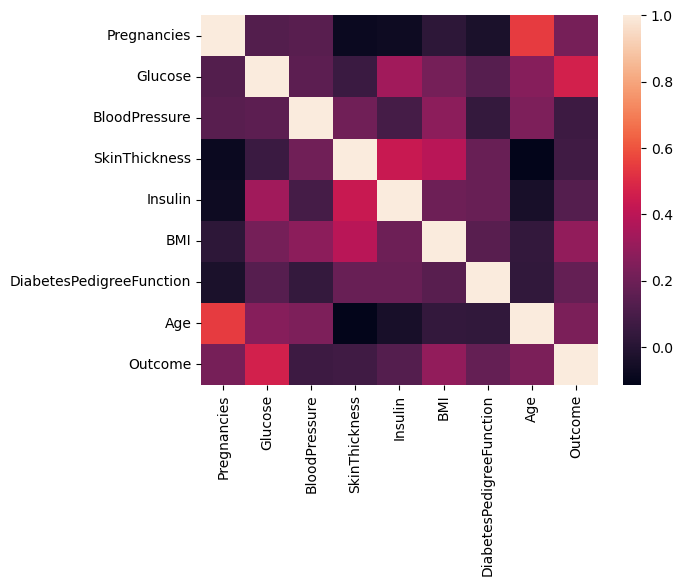

In [3]:
sns.heatmap(corr_matrix)

Covariance shows whether two variables increase/decrease together, but its magnitude depends on the units of the variables. Unlike correlation, there is no universal threshold for “high” covariance. Therefore, correlation is usually preferred in EDA.


There are no pairs of features that have high correlation in this dataset.

### Visual Exploration

#### Description

- Scatterplots: A way to visualize multivariate data to help classify and understand the relationships among the variables.
- Pairplot: Show all 2D scatter plots of each pair of features chosen from 3D Scatterplots.
- Dimensionality Reduction

#### 3D Scatterplots

This part will illustrate the relationships among three or more variables.

We could not randomly choose 3 features out of 8 features to visualize it and continue doing that until all of feature combinations are used, as it is waste of time. Instead, we could rely on the result from bivariate analysis, typically the **Correlation result**.

From the result, **Glucose** and **BMI** features have the strongest relationship with the outcome. Because of that, we will choose those as the two first features. For the third feature, we will choose variables that are related to diabete disease among the others. After some researches, **Insulin** and **Age** are the most related information, so we choose those two, and visualize iteratively.

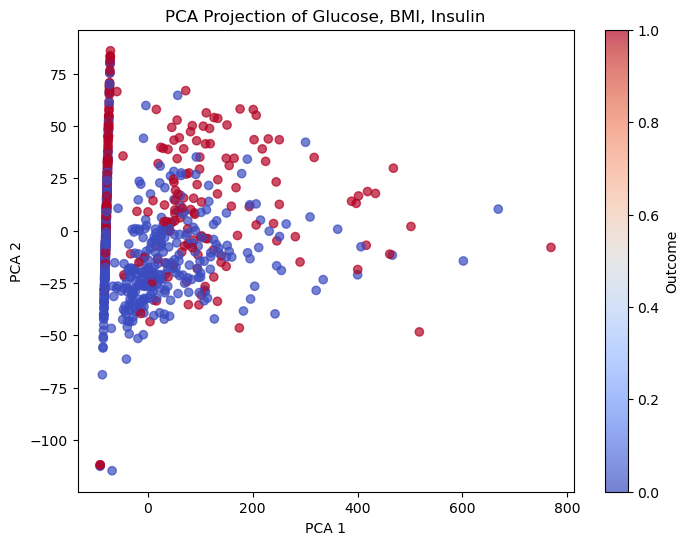

In [4]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots
import seaborn as sns
from sklearn.decomposition import PCA

# assume your dataframe is called df
# predictors
X = df[['Glucose', 'BMI', 'Insulin']]
y = df['Outcome']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Insulin')
plt.colorbar(label='Outcome')
plt.show()
# x = df['Glucose']
# y = df['BMI']
# z1 = df['Insulin']
# z2 = df['Age']
# target = df['Outcome']  # 0 = no diabetes, 1 = diabetes

# # 3D scatter: Glucose, BMI, Insulin
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

# ax.set_xlabel('Glucose')
# ax.set_ylabel('BMI')
# ax.set_zlabel('Insulin')
# ax.set_title('3D Scatter: Glucose, BMI, Insulin vs Outcome')

# # add legend for outcome
# legend = ax.legend(*scatter.legend_elements(), title="Outcome")
# ax.add_artist(legend)

# plt.show()

# # 3D scatter: Glucose, BMI, Age
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

# ax.set_xlabel('Glucose')
# ax.set_ylabel('BMI')
# ax.set_zlabel('Age')
# ax.set_title('3D Scatter: Glucose, BMI, Age vs Outcome')

# legend = ax.legend(*scatter.legend_elements(), title="Outcome")
# ax.add_artist(legend)

# plt.show()

The 3D scatterplots show too much overlap from the three chosen features, which can be conclude that three features alone will not fully separate diabetics and non-diabetics. It could be a hint that we should try higher dimensions or smarter approaches.

#### 4D Scatterplots (Glucose, BMI, Insulin, Age)

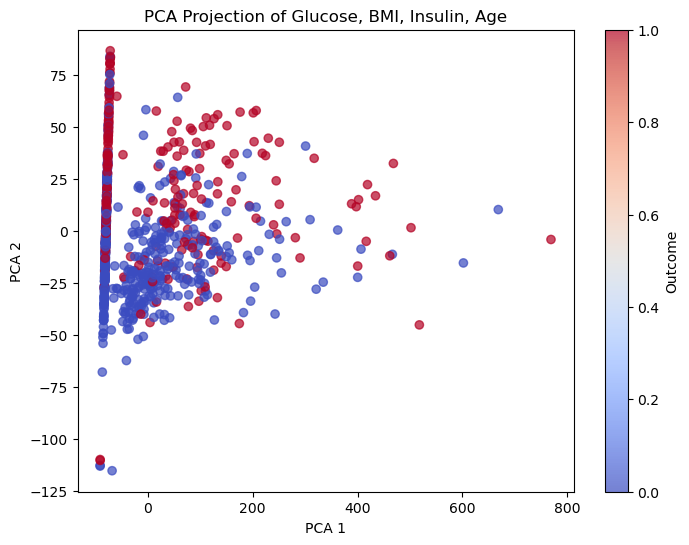

In [5]:
from sklearn.decomposition import PCA

# pick your features
X = df[['Glucose','BMI','Insulin','Age']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Insulin, Age')
plt.colorbar(label='Outcome')
plt.show()


#### 5D Scatterplots (Glucose, BMI, Insulin, Pregnancy, Age)

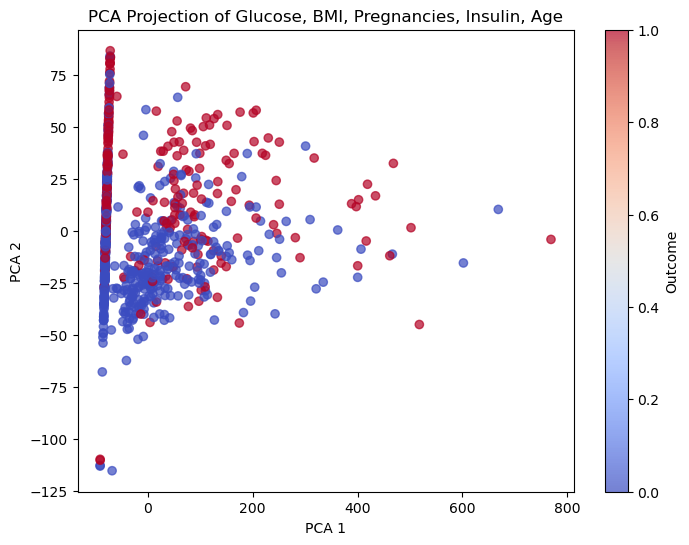

In [6]:
from sklearn.decomposition import PCA

# pick your features
X = df[['Glucose','BMI','Insulin','Age', 'Pregnancies']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Pregnancies, Insulin, Age')
plt.colorbar(label='Outcome')
plt.show()


#### 6D Scatterplots (Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction)

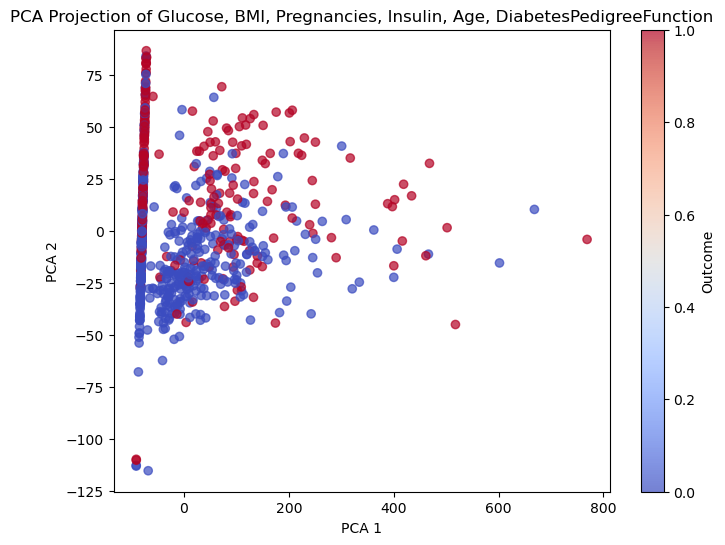

In [7]:
from sklearn.decomposition import PCA

# pick your features
X = df[['Glucose','BMI','Insulin','Age', 'Pregnancies', 'DiabetesPedigreeFunction']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction')
plt.colorbar(label='Outcome')
plt.show()


#### Four of it

C:\Users\thien408\AppData\Local\Temp\ipykernel_26956\943075655.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


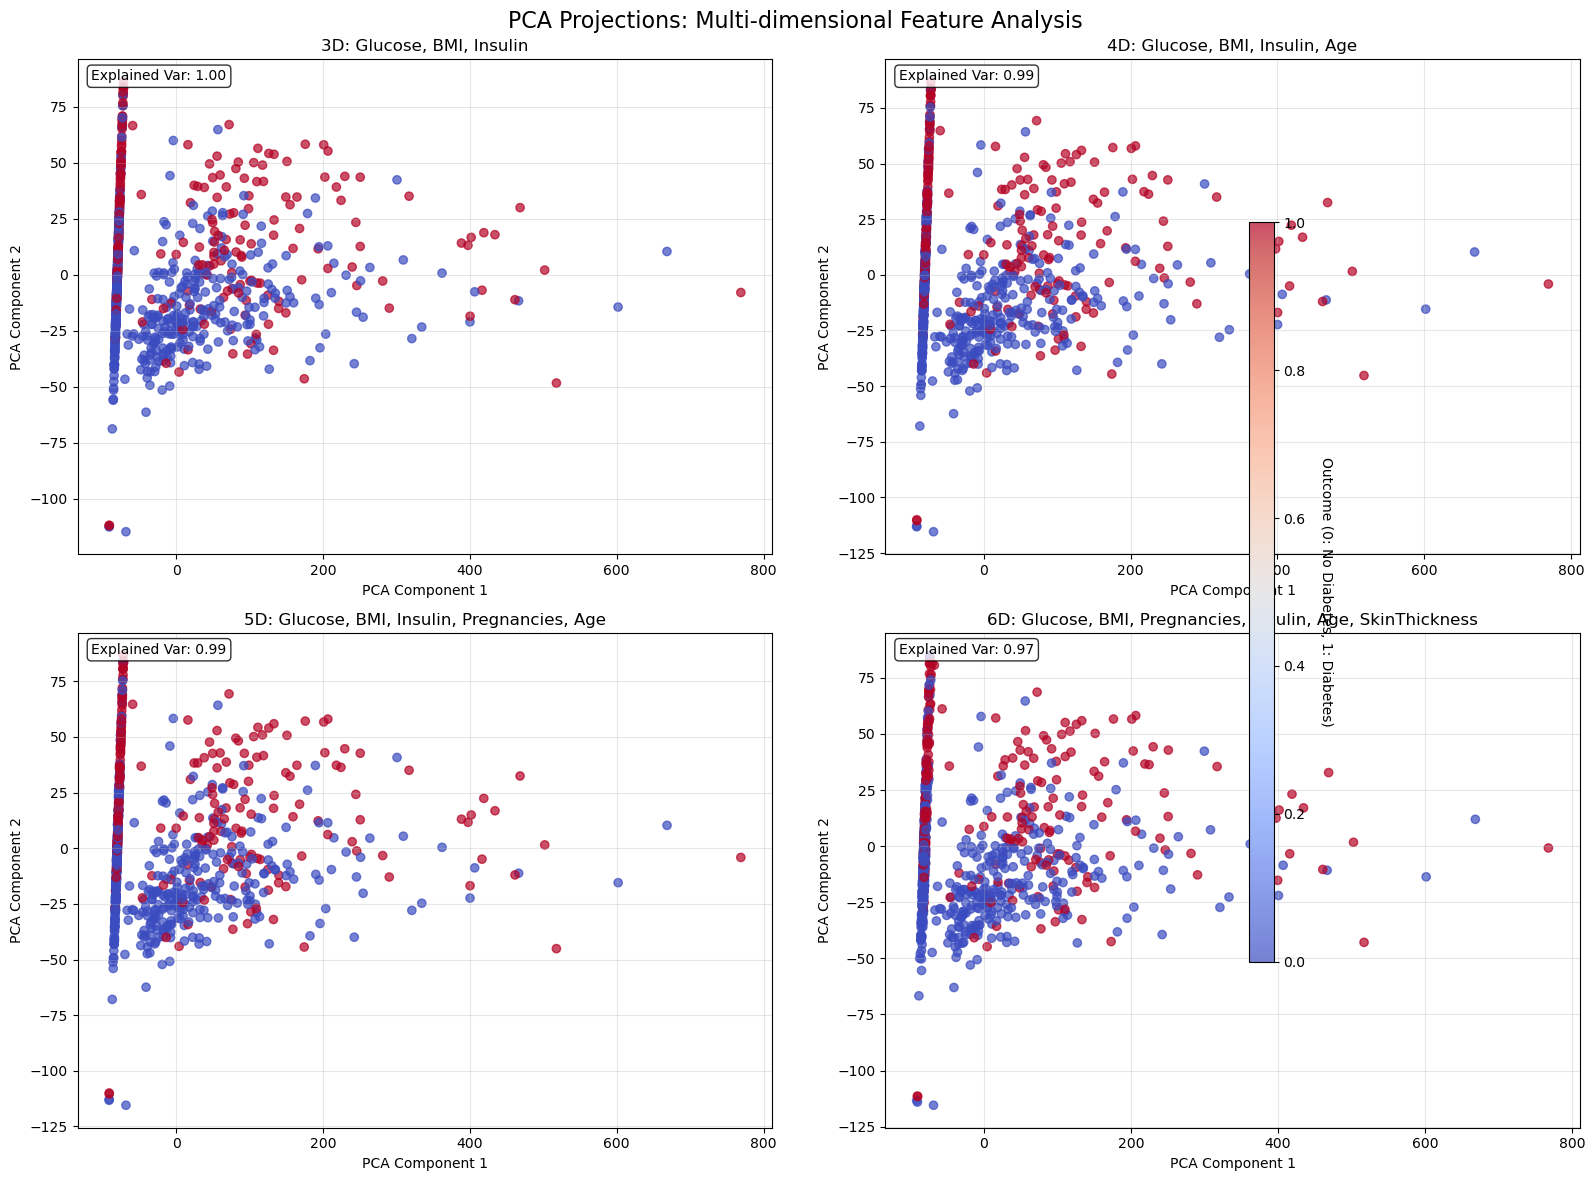

=== PCA EXPLAINED VARIANCE ANALYSIS ===
3D: Glucose, BMI, Insulin:
  PC1: 0.933 (93.3%)
  PC2: 0.063 (6.3%)
  Total: 0.996 (99.6%)

4D: Glucose, BMI, Insulin, Age:
  PC1: 0.924 (92.4%)
  PC2: 0.063 (6.3%)
  Total: 0.987 (98.7%)

5D: Glucose, BMI, Insulin, Pregnancies, Age:
  PC1: 0.923 (92.3%)
  PC2: 0.063 (6.3%)
  Total: 0.987 (98.7%)

6D: Glucose, BMI, Pregnancies, Insulin, Age, SkinThickness:
  PC1: 0.911 (91.1%)
  PC2: 0.062 (6.2%)
  Total: 0.973 (97.3%)



In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the feature combinations
feature_combinations = [
    (['Glucose', 'BMI', 'Insulin'], '3D: Glucose, BMI, Insulin'),
    (['Glucose','BMI','Insulin','Age'], '4D: Glucose, BMI, Insulin, Age'),
    (['Glucose','BMI','Insulin','Age', 'Pregnancies'], '5D: Glucose, BMI, Insulin, Pregnancies, Age'),
    (['Glucose','BMI','Insulin','Age', 'Pregnancies', 'DiabetesPedigreeFunction'], '6D: Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction')
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('PCA Projections: Multi-dimensional Feature Analysis', fontsize=16, y=0.98)

# Flatten axes for easier iteration
axes = axes.flatten()

# Create PCA plots
for i, (features, title) in enumerate(feature_combinations):
    # Prepare data
    X = df[features]
    y = df['Outcome']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create scatter plot
    scatter = axes[i].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
    axes[i].set_xlabel('PCA Component 1')
    axes[i].set_ylabel('PCA Component 2')
    axes[i].set_title(title)
    axes[i].grid(True, alpha=0.3)
    
    # Add explained variance to title
    explained_var = pca.explained_variance_ratio_
    axes[i].text(0.02, 0.98, f'Explained Var: {sum(explained_var):.2f}', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a single colorbar for all subplots
cbar = fig.colorbar(scatter, ax=axes, shrink=0.8, aspect=30)
cbar.set_label('Outcome (0: No Diabetes, 1: Diabetes)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Print explained variance for each combination
print("=== PCA EXPLAINED VARIANCE ANALYSIS ===")
for features, title in feature_combinations:
    X = df[features]
    pca = PCA(n_components=2)
    pca.fit(X)
    explained_var = pca.explained_variance_ratio_
    print(f"{title}:")
    print(f"  PC1: {explained_var[0]:.3f} ({explained_var[0]*100:.1f}%)")
    print(f"  PC2: {explained_var[1]:.3f} ({explained_var[1]*100:.1f}%)")
    print(f"  Total: {sum(explained_var):.3f} ({sum(explained_var)*100:.1f}%)")
    print()

#### Summary

not done

### Summary

not done

## The end